# <center>L2 Computational Physics</center>

## <center>Week 3: Differential Equations I</center>

In [1]:
# usual packages to import
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

In this notebook, you will generate and plot the decay curve for Iodine-133 analytically and numerically. $^{133}\textrm{I}$ has a half life $t_{1/2}$ of 20.8 hours. This means that half of the nuclei will have decayed after time $t_{1/2}$. Derive the mean lifetime $\tau$ from that information.

In [2]:
# define a function to calculate the mean lifetime from the half life
import numpy as np
def meanLifetime(halfLife):
    # YOUR CODE HERE
    return(halfLife/np.log(2))
halfLife = 20.8
TAU = meanLifetime(halfLife)
print(TAU)



30.00805685049044


Check your average lifetime:

In [3]:
# this test is worth 1 mark
assert numpy.isclose(TAU, 30.0080568505)         

### The Decay Equation

Implement the function `f_rad` such that the differential equation 

$$ \frac{dN}{dt} = f_{rad}(N,t)$$

describes the radioactive decay process.

- *Your function should return values using hours as the time unit.*
- *The function should use the constant* `TAU`.

In [26]:
def f_rad(N, t):
    # YOUR CODE HERE
    return (-(N*(1/TAU)))
N = 1000
t=0
print (f_rad(N,t))

-33.3243836807666


Make sure your function works:

In [27]:
# this test cell is worth 1 mark
assert numpy.isclose(f_rad(1000, 0), -33.324383681)           

Solve this first order, ordinary differential equation analytically. Implement this function below, naming it `analytic`. The function should take an initial number of atoms `N0` at time `t=0`, and a time argument. The function should return nuclei count at the time argument. Make sure the function also works for numpy arrays.

In [28]:
def analytic(N0, t):
    # YOUR CODE HERE
    return(N0*np.exp(-t/TAU))
N0=1000
t=41.6
print (analytic(N0,t))

250.0


Check your answer for a single time:

In [29]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, 41.6), 250.0)           

In [30]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, numpy.arange(0, 60, 6)), 
                     [1000.        ,  818.77471839,  670.39203948,  548.90005334,
                       449.4254866 ,  367.97822623,  301.29126855,  246.68967356,
                       201.983268  ,  165.37879338]).all()


## Numerically Solving the ODE

We now wish to solve our differential equation numerically. We shall do this using Euler's and RK4 methods.

### Euler's Method

Create a function which takes as its arguments the initial number of atoms, `n0`, the initial time `t0`, the time step, `dt`, and the number of steps to perform, `n_steps`.  This function should return an array of the number of counts at each time step using Euler's method. This array should contain the initial and final values, so the array length should be `n_steps+1` 

In [38]:
def solve_euler(f, n0, t0, dt, n_panels):
    # YOUR CODE HERE
    n = n0
    t= t0
    x = numpy.array([n0])
    for i in range(0, n_panels):
        n= n + dt*f(n,t)
        x = numpy.append (x, n)
        t = t+dt
    return(x)
f= f_rad
n0=1000
t0=0
dt=1
n_panels=17
print(solve_euler(f, n0, t0, dt, n_panels))

[1000.          966.67561632  934.46174719  903.32138539  873.21875695
  844.11928006  815.9895253   788.79717728  762.5109975   737.10078846
  712.53735897  688.79249063  665.8389054   643.65023424  622.20098688
  601.46652247  581.4230213   562.04745746]


Try your solution:

In [39]:
# this test is worth 1 mark
assert len(solve_euler(f_rad, 1000, 0, 1, 17)) == 18

In [40]:
# this test is worth 2 marks
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 1), [1000.,  800.05369792]).all()

In [41]:
# this test is worth 2 mark
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 10), [1000.        ,  800.05369792,  640.08591955,  512.10310692,
                                                409.7099844 ,  327.7899881 ,  262.24959212,  209.81375595,
                                                167.86227132,  134.29883091,  107.4462763 ]).all()

### RK 4 method

Implement the RK4 method in the `solve_RK4` function. The arguments are the same as for `solve_euler`.

In [42]:
def solve_RK4(f, n0, t0, dt, nsteps):
    # YOUR CODE HERE
    n = n0
    t=t0
    x = numpy.array ([n0])
    for i in range (0, nsteps):
        k1 = f(n,t)
        n_temp = n + (dt/2)*k1
        k2 = f(n_temp, (t+dt/2))
        n_temp = n+ (dt/2)*k2
        k3 = f(n_temp, (t+dt/2))
        n_temp = n + dt*k3
        k4 = f(n_temp, t+dt)
        k = (1/6)*(k1+ 2*k2+ 2*k3+ k4)
        n = n + dt*k 
        x = numpy.append(x,n)
        t = t+dt
    return (x)
f= f_rad
n0 = 1000
t0 = 0 
dt = 6
nsteps = 1

print (solve_RK4(f, n0, t0, dt, nsteps))

[1000.          818.77729521]


In [43]:
# This checks that we return an array of the right length
# this test is worth 1 mark
assert len(solve_RK4(f_rad, 1000, 0, 1, 17)) == 18

In [44]:
# This checks that a single step is working
# this test is worth 2 mark
assert numpy.isclose(solve_RK4(f_rad, 1000,0, 6, 1), [1000.,  818.7773]).all()

In [45]:
# This checks multiple steps
# this test is worth 2 marks
assert numpy.isclose(solve_RK4(f_rad, 1000, 0, 6, 10), [
    1000.,
    818.77729521,  
    670.39625915,  
    548.90523578,
    449.43114428,  
    367.9840167,  
    301.29695787,  
    246.69510822, 
    201.98835345,  
    165.3834777,  
    135.41223655]).all()

## Plotting task

**Task 1: **

Create a plot to show that the RK4 method has an error that scales better with the number of steps than the Euler method. (click on the "+" button to create new cells.)       [task worth 5 marks]


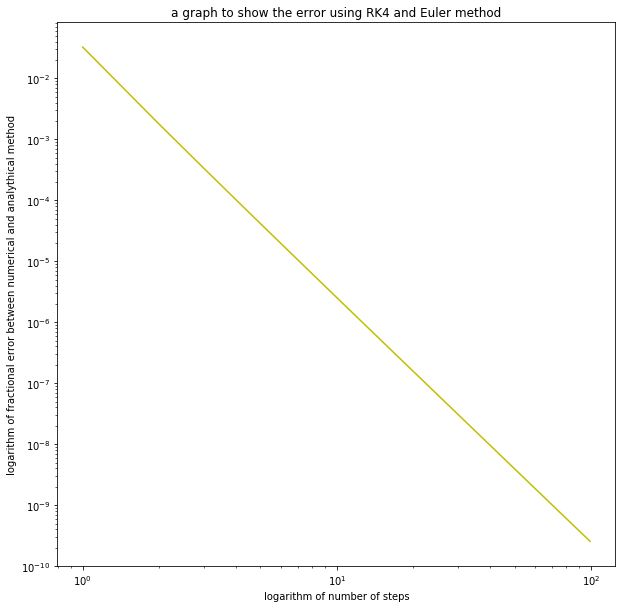

In [71]:

teststeps = numpy.arange(1,100,1)

error_rk4 = []
for nsteps in teststeps:
    dt = 10/nsteps
    error_rk4.append(abs(solve_RK4(f_rad,1000,0,dt,nsteps)[nsteps]- analytic(1000, 10)))


error_euler = []
for n_panels in teststeps:
    dt1 = 10/n_panels
    error_euler.append(abs(solve_euler(f_rad,1000,0,dt1,n_panels)[n_panels])-analytic(1000,10))
            
plt.figure(figsize=(10,10))
plt.xlabel('logarithm of number of steps')
plt.ylabel('logarithm of fractional error between numerical and analythical method')
plt.title('a graph to show the error using RK4 and Euler method')
plt.loglog(teststeps,error_rk4, '-y', label='RK4')
plt.loglog(teststeps,error_euler, '.m', label= 'Euler')
plt.show()